# Exam 2 (100 pts total)

files needed = ('covid.csv', 'wdi_e2.csv', 'clubs.csv', 'roster.csv', 'q2a.csv') You can find them in 'exam2_data_prac.zip' on the course webpage.

You have 75 minutes to complete this exam.

Answer all the questions below in this notebook. You should insert as many cells into the notebook as you need. When you are finished, upload your finished notebook to Canvas. 

* You may use your notes and the Internet, but you cannot work with others.  
* Import any packages you need to complete this exam.
* Do not modify the data files directly. All data manipulation should happen in your code.

Remember, jupyter notebooks and python have lots of built in help facilities.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas_datareader.data as web

## Question 0 (5 pts): Collison, Jack
 
Replace 'Last, First' above with your actual name. Enter it as: last name, first name.

## Question 1 (5 points): Saving figures 

1. If you are saving a file to use on a website or to embed in a MS Word document which format should you use? Why?

Insert a cell below and type your answer there. 

In [2]:
# When creating a file for use in a Word or web format, use the "scalable vector graphics" (SVG) file format. 
# When saved as an SVG, the figure will scale as the user zooms in or zooms out, while reaming clear. 
# A figured saved as a PNG, for example, will become blurry when a user zooms in.    

## Question 2A (10 pts): Apply-split-combine

The file 'covid.csv' contains data on covid tests in Wisconsin by county. Each observation in the data is a county-day. The data cover March 15, 2020 to November 16, 2020.

1. The `POS_NEW` variable contains the day's new cases. Use this variable to compute the **cumulative** number of cases in each county. 
2. Sort your results by county name (a to z) and print out the first three counties.

In [3]:
c19 = pd.read_csv('covid.csv', parse_dates=['DATE'])
c19.head(2)

,GEOID,GEO,NAME,DATE,POSITIVE,POS_NEW,POS_7DAYAVG,NEGATIVE,NEG_NEW,NEG_7DAYAVG,...,DTH_WHT,DTH_MLTOTH,DTH_UNK,DTH_E_HSP,DTH_E_NHSP,DTH_E_UNK,POS_HC_Y,POS_HC_N,POS_HC_UNK,OBJECTID
0,55001,County,Adams,2020-03-15 19:00:00+00:00,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,55003,County,Ashland,2020-03-15 19:00:00+00:00,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [4]:
cases_cum = c19[['NAME', 'POS_NEW']].groupby('NAME').sum().sort_index()
cases_cum.to_csv('q2a.csv', index_label='NAME')
cases_cum.head(3)

,POS_NEW
NAME,
Adams,852.0
Ashland,514.0
Barron,2721.0


## Question 2B (15 pts): Bar graphs and label formatting 

If you completed question 2A, you may use your results in this question. If not, use the file 'q2a.csv' to complete this question.

1. Create two subplots arranged as one column and two rows. Make the figure size 15 inches by 15 inches. 
3. In the top subplot, create a bar plot of the cumulative cases for the counties whose names start with A-L. The x axis should be the names of the counties.
4. In the bottom subplot, create a bar plot of the cumulative cases for the counties whose names start with M-Z. The x axis should be the names of the counties.
5. Rotate the county names on the x axis 90 degrees so that they are vertical.
6. Label the y axes 'cumulative number of cases.'
7. The bars should be silver and the major y-axis grid lines should be white.
8. Give your graph a title.
9. Remove the top and right spines from each subplot. 

In [5]:
# If needed:
cases_cum = pd.read_csv('q2a.csv')
cases_cum = cases_cum.set_index('NAME')

low = cases_cum[cases_cum.index.str.slice(0,1) <= 'L']
high = cases_cum[cases_cum.index.str.slice(0,1) > 'L']

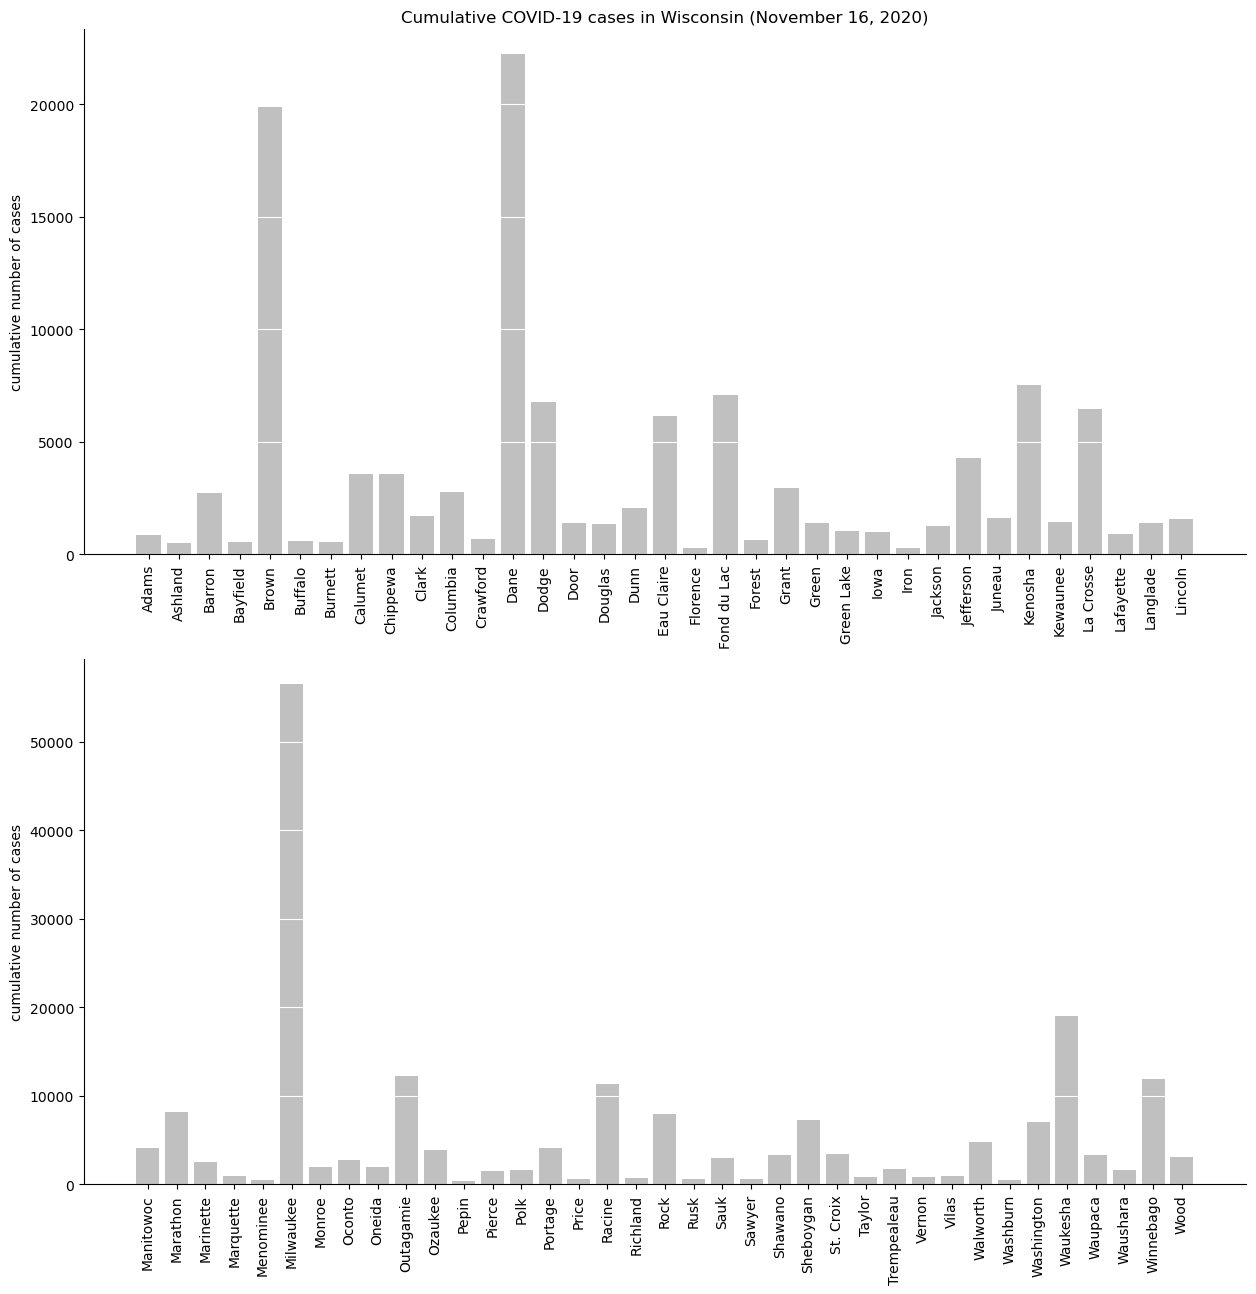

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(15,15))

ax[0].bar(low.index, low['POS_NEW'], color='silver')
ax[1].bar(high.index, high['POS_NEW'], color='silver')

ax[0].set_title('Cumulative COVID-19 cases in Wisconsin (November 16, 2020)')

for a in ax:
    a.tick_params(axis='x', labelrotation=90)
    a.set_ylabel('cumulative number of cases')
    a.grid(color='white', axis='y')
    sns.despine(ax=a)

## Question 3 (15 pts): Long and wide data

The file 'wdi_e2.csv' contains data on real GDP and the working age population (15-64 years) for China and Japan from 1970 to 2019. 

1. Compute the ratio of GDP to the working age population for both countries for all years. Name the variable 'gdpc'.
2. Make sure that your DataFrame is organized so that the unit of observation (country-date) are rows and the variables are columns. 
3. Sorth the index of your DataFrame.
4. Print out the first two rows of your DataFrame.

In [7]:
wdi = pd.read_csv('wdi_e2.csv')
wdi = wdi.set_index(['var', 'DATE', 'cty'])
wdi.head(2)

value
var DATE       cty              
gdp 1970-01-01 chn    228.510558
               jpn  18699.742958

In [8]:
wdi = wdi.unstack(['var'])
wdi.head(2)

value           
var                      gdp        pop
DATE       cty                         
1970-01-01 chn    228.510558  55.844752
           jpn  18699.742958  69.010653

In [9]:
# You can leave the 'value' level and then add 'value' in all of the variable names, e.g., ('value', 'gdp')
wdi.columns = wdi.columns.droplevel(0)
wdi['gdpc'] = wdi['gdp'] / wdi['pop']
wdi.sort_index(inplace=True)
wdi.head(2)

var                      gdp        pop        gdpc
DATE       cty                                     
1970-01-01 chn    228.510558  55.844752    4.091890
           jpn  18699.742958  69.010653  270.968933

## Question 4 (10 pts): FRED and working with dates

1. Download the weekly initial (unemployment) claims data for Wisconsin from FRED. Get the data from the beginning of 2019 to the most recent. \[Use the FRED website to find the variable code for 'Initial Claims in Wisconsin'.\]
2. Compute the average weekly claims for 2019 and the average weekly claims for 2020. Print them out as below, replacing the xs with the appropriate numbers.

   'The 2019 average weekly claims are xxxx. The 2020 average weekly claims are xxxxx.'
  
Note that the numbers are printed out as integers. 

In [10]:
claims = web.DataReader('WIICLAIMS', 'fred', start='2019-01-01') 

In [11]:
# Two ways to do this. 

# 1. Slice
claims19 = claims.loc['2019-01-01':'2019-12-31'].mean()
claims20 = claims.loc['2020-01-01':'2020-12-31'].mean()

# 2. Groupby!
means = claims.groupby(claims.index.year).mean()

In [12]:
print('The 2019 average weekly claims are {0:.0f}. The 2020 average weekly claims are {1:.0f}.'
      .format(float(means.loc[2019]), float(means.loc[2020])))

The 2019 average weekly claims are 5520. The 2020 average weekly claims are 23129.


## Done!
This was originally an exam given in the past. I think it was a little too long. Let's call Q1-Q4 the about the right length for the exam. I am leaving Q5 below, though, so you can use it to practice.  

## Question 5 (20 pts): Merging and cleaning

1. Load 'clubs.csv' into a DataFrame named `clubs`. The file contains data about four BIG10 schools. 
2. Load 'roster.csv' into a DataFrame named `roster`. The file contains data about football players at four BIG10 schools.
3. Merge the two DataFrames. The new DataFrame should contain all the players that are in the players dataset, matched to their team information.  Name the new DataFrame `data`. 
4. How many matches do you have? Print out the number as "There are xx matches in data."
5. There *should* be 50 matches but you probably found fewer. Let's fix this. Clean up the `clubs` and `roster` DataFrames using pandas commands (do not modify the data files) and perform another merge. Name this new matched DataFrame `data_clean`.
6. Print out the number as "There are xx matches in data_clean." (The xx should be equal to 50 at this point!)

In [13]:
clubs = pd.read_csv('clubs.csv')
roster = pd.read_csv('roster.csv')
print(clubs.head(2))
print(roster.head(2))

   team   mascot      city state
0   wis   badger   Madison    WI
1   nwn  wildcat  Evanston    IL
   NUMBER          NAME POSITION  WEIGHT CLASS TEAM
0      17     Jack Coan       QB     221    Jr  wis
1       5  Graham Mertz       QB     215    Fr  wis


In [14]:
data = pd.merge(left=clubs, right=roster, left_on='team', right_on='TEAM', how='outer', indicator=True)
print('There are {} matches in data.'.format(data['_merge'].value_counts().loc['both']))

There are 25 matches in data.


In [15]:
# Extra whitespace!
clubs['team'].unique()

array([' wis', 'nwn', 'umi ', 'umn', 'msu'], dtype=object)

In [16]:
# Extra whitespace!
roster['TEAM'].unique()

array(['wis', 'wis ', 'umn', 'umi', 'umi ', 'nwn', 'utah'], dtype=object)

In [17]:
# Remove the extra whitespace.
clubs['team'] = clubs['team'].str.strip()
roster['TEAM'] = roster['TEAM'].str.strip()

In [18]:
data_clean = pd.merge(left=clubs, right=roster, left_on='team', right_on='TEAM', how='outer', indicator=True)
print('There are {} matches in data_clean.'.format(data_clean['_merge'].value_counts().loc['both']))

There are 50 matches in data_clean.
